In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]
# calculate the mean std

mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
X = []
Y = []
for i in range(len(mean_17)):
    X.append([mean_17[i],std_17[i]])
scaler = StandardScaler().fit(X)
X = scaler.transform (X)
weekly_17 = data_17.groupby('Week_Number')['label'] # select Friday's data
for i,j in weekly_17:
    Y.append(j.tolist()[0])


X_train ,X_test , Y_train , Y_test = train_test_split (X,Y, test_size =0.5 ,random_state =0)

In [39]:
accuracy_list = []
for i in [3,5,7,9,11]:
    knn_classifier = KNeighborsClassifier (n_neighbors =i)
    knn_classifier.fit(X_train , Y_train)
    pred_k = knn_classifier.predict(X_test)
    accuracy_list.append (np. mean ( pred_k == Y_test ))
    print('k = %d,accuracy = %f'%(i,np.mean(pred_k == Y_test)))
#question1

k = 3,accuracy = 0.923077
k = 5,accuracy = 0.807692
k = 7,accuracy = 0.769231
k = 9,accuracy = 0.730769
k = 11,accuracy = 0.730769


In [40]:
data_18 = data[data.Year == 2018]
# calculate the mean std

mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()[0:-1]
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()[0:-1]

X_18 = []
Y_18 = []
for i in range(len(mean_18)):
    X_18.append([mean_18[i],std_18[i]])
scaler = StandardScaler().fit(X_18)
X_18 = scaler.transform (X_18)
weekly_18 = data_18.groupby('Week_Number')['label'] # select Friday's data
for i,j in weekly_18:
    Y_18.append(j.tolist()[0])

knn_classifier = KNeighborsClassifier (n_neighbors =3)
knn_classifier.fit(X , Y)
pred_k = knn_classifier.predict(X_18)

print('accuracy : ',np. mean ( pred_k == Y_18[0:-1] ))


accuracy :  0.8653846153846154


In [45]:
TP = 0
FP = 0
TN = 0
FN = 0
for j in range(len(pred_k)):
    if pred_k[j] == 'green' and Y_18[j] == 'green':
        TP+=1
    elif pred_k[j] == 'green' and Y_18[j] == 'red':
        FP+=1
    elif pred_k[j] == 'red' and Y_18[j] == 'red':
        TN+=1
    elif pred_k[j] == 'red' and Y_18[j] == 'green':
        FN+=1
dic1 = {'TP':TP,'FP':FP,'TN':TN,'FN' : FN,'accuracy':(TP+TN)/len(pred_k),'TPR' :TP/(TP+FN),'TNR': TN/(TN+FP)}
result = pd.DataFrame(dic1,index = ['result'])

print(result)#question2

        TP  FP  TN  FN  accuracy  TPR       TNR
result  31   7  14   0  0.865385  1.0  0.666667


In [46]:
print('recall :', TP/(TP+FN))
print('specificity :',TN/(TN+FP))

recall : 1.0
specificity : 0.6666666666666666


In [48]:
weekly_18= data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].tolist() # select Friday's data

previous_shares = 0
previous_balance = 100
weekly_balance = []
for i in range(len(pred_k)-1):
    if  pred_k[i+1]== 'green':
        if previous_shares == 0:
            previous_shares = previous_balance / weekly_18[i]
            previous_balance = previous_shares*weekly_18[i]
        else:
            previous_shares = previous_shares
            previous_balance = previous_shares*weekly_18[i]
    elif pred_k[i+1] == 'red':
        if previous_shares != 0:
            previous_balance = previous_shares*weekly_18[i]
            previous_shares = 0
        else:
            previous_shares = previous_shares
            previous_balance = previous_balance
    weekly_balance.append(previous_balance)

print(weekly_balance)

[100.0, 100.7396449704142, 104.4484361792054, 108.24175824175823, 108.24175824175823, 108.24175824175825, 114.13097656176873, 114.13097656176873, 114.13097656176872, 114.74312125131335, 115.32805951021159, 115.32805951021159, 117.03199538083773, 116.13742904875902, 117.42958041731715, 117.84136491938511, 118.1679526279218, 113.28333646546024, 113.28333646546024, 111.6977661475233, 111.69776614752328, 113.54063861167006, 112.65437170143154, 114.15961867596366, 115.28503697467926, 113.75165454267925, 113.75165454267925, 114.21257174616527, 114.30746646453002, 116.21891722016319, 117.64233799563468, 127.64695258894862, 123.8647202426958, 123.8647202426958, 123.82443903286078, 122.22661770940486, 123.91842852247584, 121.34043109303437, 121.34043109303437, 123.29993243043162, 126.3405379539791, 128.66491195420204, 131.78660029171078, 137.2732040364231, 127.04325567497673, 127.04325567497673, 127.04325567497673, 121.90582488254393, 121.90582488254393, 115.65072685773914, 115.65072685773914]


In [50]:
share_1 = 100/weekly_18[0]
balance_1 = share_1 * weekly_18[-1]
print('buy_and_hold amount :', balance_1)
print('base on label amount :', weekly_balance[-1])

buy_and_hold amount : 94.18850380388842
base on label amount : 115.65072685773914


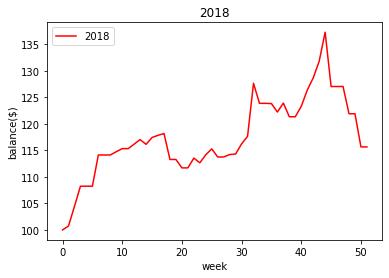

In [52]:
data_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]  # select Friday's data
plt.plot(data_18['Week_Number'], weekly_balance, label=2018,color = 'red')
plt.xlabel('week')
plt.ylabel('balance($)')
plt.title(2018)
plt.legend()

plt.show()